In [ ]:
# Adaptado de: Meduri Venkata Shivaditya
!pip install bayes_logistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import bayes_logistic #
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bayes_logistic: filename=bayes_logistic-0.2.0-py2.py3-none-any.whl size=8599 sha256=27cd16b17b0dcfb113d3b18c9ce3b1dce74aa8c8186c02e584dee4c5f3526e28
  Stored in directory: /root/.cache/pip/wheels/46/94/53/543738a3e4fbe1f1754cd7ab7792d633d5277d57290009a063
Successfully built bayes_logistic


Creamos el conjunto de datos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

XXX = iris["data"][0:150, :]  # 4 caracteristicas en 150 datos de la BD IRIS
y = (iris["target"] == 0).astype(int)  # 0: Iris-Setosa, 1: El resto

# Se obtiene 2 componentes principales para graficar en 2D
pca = PCA(n_components=2)
XX = pca.fit_transform(XXX)

# Calcular la media de cada columna
mean = np.mean(XX, axis=0)

# Calcular la desviación estándar de cada columna
std = np.std(XX, axis=0)

# Normalizar los datos con media 0
X = (XX - mean) / std

X_1 = X[0:30] # los train son 30 de setosa
X_2 = np.vstack((X[50:80], X[100:130]))  # los train son 30 de versicolor + 30 de virginica


mu1= np.mean(X_1)
mu2= np.mean(X_2)

class1_std =  np.std(X_1)
class2_std =  np.std(X_2)

print(class2_std)
N = 45
D = 2
X = np.vstack((X_1,X_2)) # Features
t = np.vstack((np.zeros((N,1)),np.ones((N,1)))) # Labels

print(np.shape(X), np.shape(t))

0.8887433291211285
(90, 2) (90, 1)


Visualizamos los datos

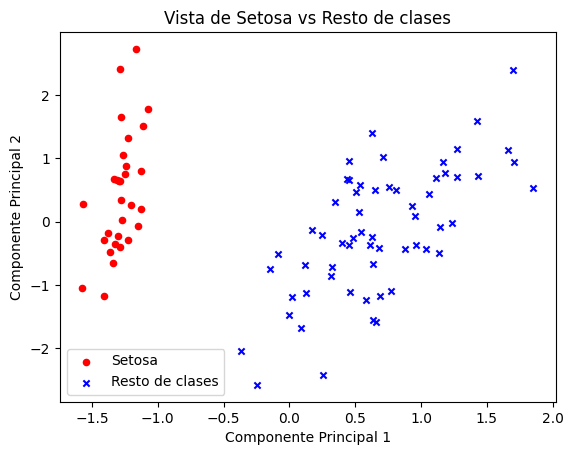

In [ ]:
# # #Plotting data
# Obtener coordenadas de las muestras de la clase "Setosa"
x_setosa, y_setosa = X_1.T

# Obtener coordenadas de las muestras del resto de las clases
x_resto, y_resto = X_2.T

# Graficar las muestras de la clase "Setosa" en rojo
plt.scatter(x_setosa, y_setosa, c='red', s=20, marker='o', label='Setosa')

# Graficar las muestras del resto de las clases en azul
plt.scatter(x_resto, y_resto, c='blue', s=20, marker='x', label='Resto de clases')

# Configuración del gráfico
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Vista de Setosa vs Resto de clases')
plt.legend()

# Mostrar el gráfico
plt.show()


Gráficamos distintos limites de decisión

(100, 100) (100, 100)
(10000, 2)


Text(0.5, 1.0, 'data')

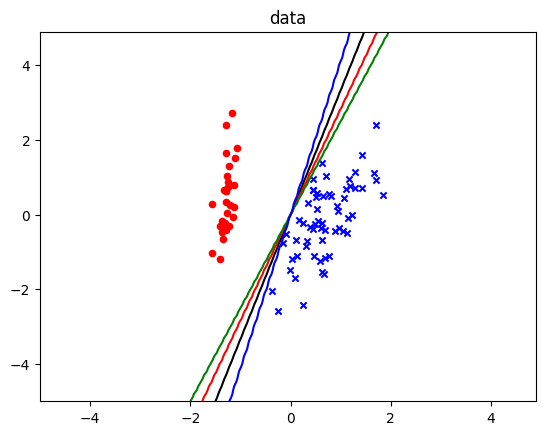

In [ ]:
#Plotting data
x_setosa, y_setosa = X_1.T

# Obtener coordenadas de las muestras del resto de las clases
x_resto, y_resto = X_2.T

# Graficar las muestras de la clase "Setosa" en rojo
plt.scatter(x_setosa, y_setosa, c='red', s=20, marker='o', label='Setosa')

# Graficar las muestras del resto de las clases en azul
plt.scatter(x_resto, y_resto, c='blue', s=20, marker='x', label='Resto de clases')
#Plotting Predictions
Range = 5
step = 0.1 #0.9
xx, yy = np.meshgrid(np.arange(-Range,Range,step),np.arange(-Range,Range,step))
print(np.shape(xx), np.shape(yy))
[n,n] = xx.shape
W = np.hstack((xx.reshape((n*n, 1)),yy.reshape((n*n, 1))))
print(np.shape(W))
Xgrid = W
ws = np.array([[20, -6], [34, -12], [35, -14], [37, -9]]) # Limites de decisión %3 interception 4,2 pendiente
col = ['black', 'red', 'green', 'blue']
for ii in range(ws.shape[0]):
    w = ws[ii][:]
    logits = np.dot(Xgrid,w)
    pred = 1.0/(1+np.exp(-logits)) # sigmoid
    plt.contour(xx, yy, pred.reshape((n, n)), 1, colors=col[ii])
plt.title("data")

Gráficamos la Probabilidad a Priori

[[1075.    0.]
 [   0. 1075.]]
(10000, 2)


Text(0.5, 1.0, 'Log-Prior')

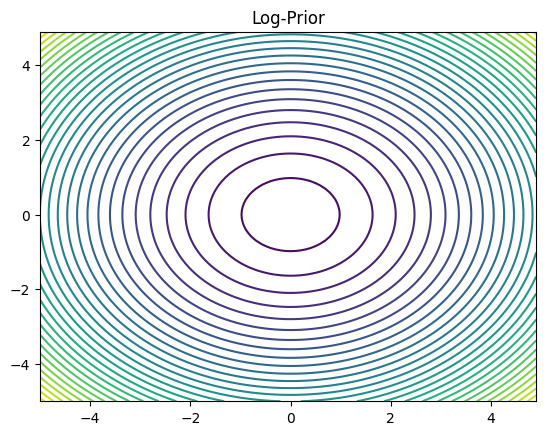

In [ ]:
#Plot prior, likelihood, posterior
alpha = 1075
Xt = np.transpose(X)
f=np.dot(W,Xt)
print(np.identity(D)*alpha)
log_prior = np.log(multivariate_normal.pdf(W, cov=(np.identity(D))*alpha))
print(np.shape(W))
log_like = np.dot(np.dot(W, Xt), t) - np.sum(np.log(1+np.exp(f)), 1).reshape((n*n,1))
log_joint = log_like.reshape((n*n,1)) + log_prior.reshape((n*n,1))

#Plotting log-prior
plt.figure(1)
plt.contour(xx, yy, -1*log_prior.reshape((n,n)), 30)
plt.title("Log-Prior")

Gráficamos el likelihood

-0.06896551724138586


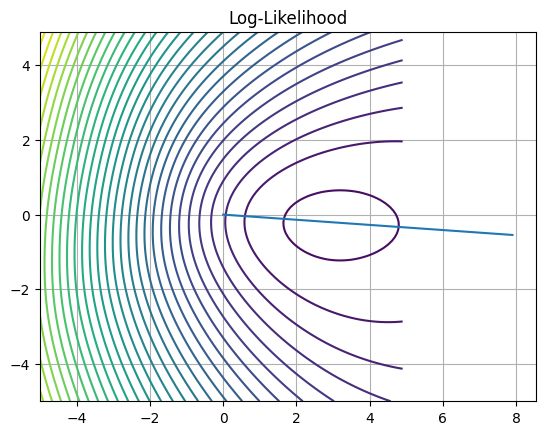

In [ ]:
plt.figure(1)
plt.contour(xx, yy, -1*log_like.reshape((n,n)), 30)
plt.title("Log-Likelihood")

#Plotting points corresponding to chosen lines
for ii in range(0, ws.shape[0]):
    w = np.transpose(ws[ii, :])
    plt.annotate(str(ii+1), xy=(w[0], w[1]), color=col[ii])

j=np.argmax(log_like)
wmle = W[j, :]
slope = wmle[1] / wmle[0]
print(slope)
plt.plot([0, 7.9], [0, 7.9*slope])
plt.grid()

Gráficamos la posterior sin normalizar

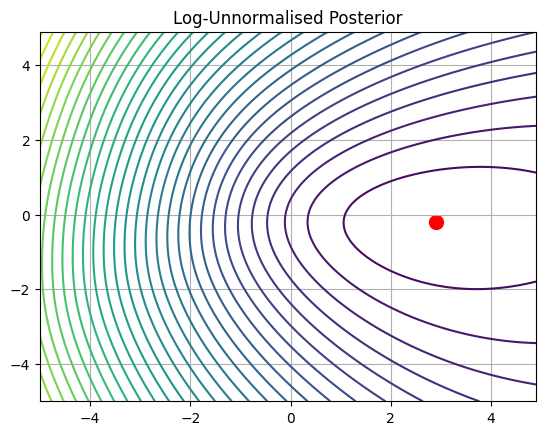

In [ ]:
#Plotting the log posterior(Unnormalised
plt.figure(2)
plt.contour(xx,yy,-1*log_joint.reshape((n,n)), 30)
plt.title("Log-Unnormalised Posterior")
j2=np.argmax(log_joint)
wb = W[j2][:]
plt.scatter(wb[0], wb[1], c='red' , s = 100)
plt.grid()

Entrenamos el modelo de regresión logística bayesiana

In [ ]:
#https://bayes-logistic.readthedocs.io/en/latest/usage.html
#Visit the website above to access the source code of bayes_logistic library
#parameter info : bayes_logistic.fit_bayes_logistic(y, X, wprior, H, weights=None, solver='Newton-CG', bounds=None, maxiter=100)
wfit, hfit = bayes_logistic.fit_bayes_logistic(t.reshape((N*D)), X, np.zeros(D), ((np.identity(D))*1/alpha), weights=None, solver='Newton-CG', bounds=None, maxiter=100)
co = np.linalg.inv(hfit)
#wfit represents the posterior parameters (MAP estimate)
#hfit represents the posterior Hessian  (Hessian of negative log posterior evaluated at MAP parameters)

Gráficamos la posterior normalizada

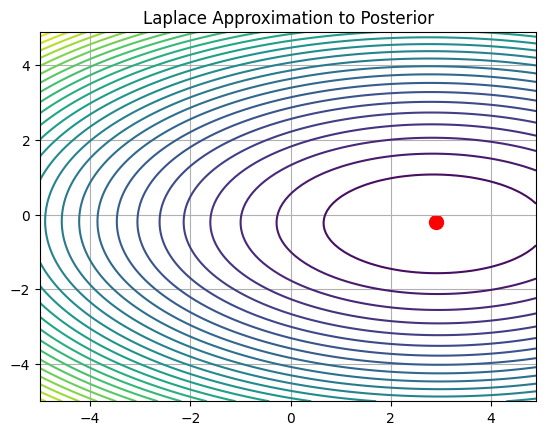

In [ ]:
log_laplace_posterior = np.log(multivariate_normal.pdf(W, mean = wfit, cov=co))
plt.contour(xx, yy, -1*log_laplace_posterior.reshape((n,n)), 30)
plt.scatter(wb[0], wb[1], c='red' , s = 100)
plt.title("Laplace Approximation to Posterior")
plt.grid()

Graficamos la distribución predictiva

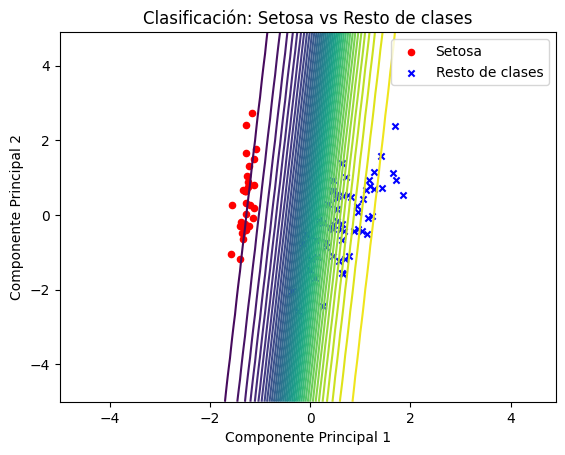

In [ ]:
#Plotting the predictive distribution for logistic regression
plt.figure(5)
logits=np.dot(Xgrid,wfit) #  y=w1x+w2
pred = 1.0/(1+np.exp(-logits))
plt.contour(xx, yy, pred.reshape((n,n)), 45)


# Obtener coordenadas de las muestras de la clase "Setosa"
x_setosa, y_setosa = X_1.T

# Obtener coordenadas de las muestras del resto de las clases
x_resto, y_resto = X_2.T

# Graficar las muestras de la clase "Setosa" en rojo
plt.scatter(x_setosa, y_setosa, c='red', s=20, marker='o', label='Setosa')

# Graficar las muestras del resto de las clases en azul
plt.scatter(x_resto, y_resto, c='blue', s=20, marker='x', label='Resto de clases')

# Configuración del gráfico
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clasificación: Setosa vs Resto de clases')
plt.legend()

# Mostrar el gráfico
plt.show()

# x_1, y_1 = X[np.where(t == 0)[0]].T
# x_2, y_2 = X[np.where(t == 2)[0]].T
# plt.scatter(x_1, y_1, c='red', s=20, marker='o')
# plt.scatter(x_2, y_2, c = 'blue', s=40, marker = 'x')
# plt.title("p(y=1|x, wMAP)")

Limite de decisión para diversos pesos muestreados

Text(0.5, 1.0, 'Decision boundary for sampled w')

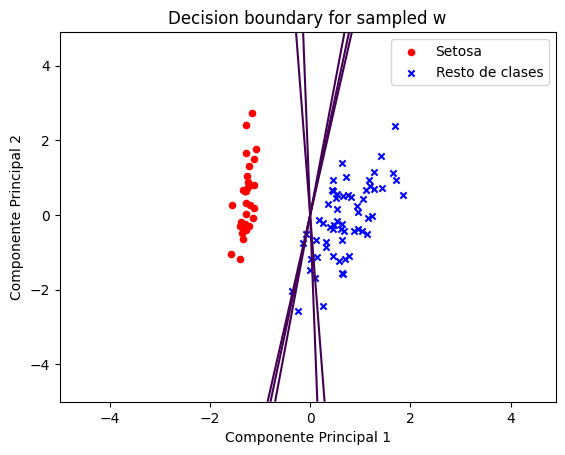

In [ ]:
#Decision boundary for sampled w

# Obtener coordenadas de las muestras de la clase "Setosa"
x_setosa, y_setosa = X_1.T

# Obtener coordenadas de las muestras del resto de las clases
x_resto, y_resto = X_2.T

# Graficar las muestras de la clase "Setosa" en rojo
plt.scatter(x_setosa, y_setosa, c='red', s=20, marker='o', label='Setosa')

# Graficar las muestras del resto de las clases en azul
plt.scatter(x_resto, y_resto, c='blue', s=20, marker='x', label='Resto de clases')

# Configuración del gráfico
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clasificación: Setosa vs Resto de clases')
plt.legend()

# Mostrar el gráfico


s = 5
for i in range(s):
    wsamp = np.random.multivariate_normal(mean = wfit, cov=co)
    pred = 1.0/(1+np.exp(np.dot(-Xgrid,wsamp)))
    plt.contour(xx, yy, pred.reshape((n,n)), np.array([0.5]))
plt.title("Decision boundary for sampled w")

MC approximation

Text(0.5, 1.0, 'MC approx of p(y=1|x)')

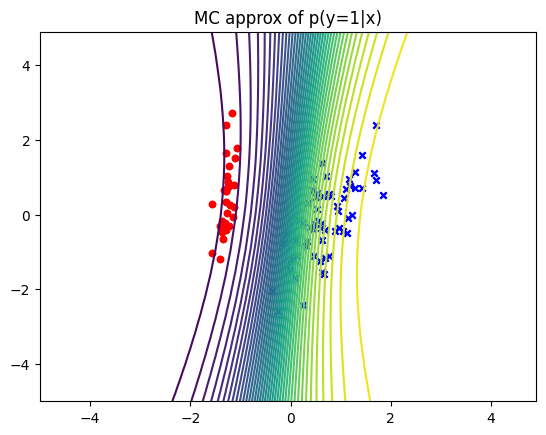

In [ ]:
#MC
plt.figure(7)
plt.scatter(x_setosa, y_setosa, c='red', s=20, marker='o', label='Setosa')
plt.scatter(x_resto, y_resto, c='blue', s=20, marker='x', label='Resto de clases')

predm = np.zeros((n*n,1))
s = 50
for i in range(s):
    wsamp = np.random.multivariate_normal(mean = wfit, cov=co)
    pred = 1.0/(1+np.exp(np.dot(-Xgrid,wsamp)))
    predm = np.add(predm, pred.reshape((n*n, 1)))

predm = predm/s
plt.contour(xx, yy, predm.reshape((n,n)), 45)
plt.scatter(x_setosa, y_setosa, c='red', s=20, marker='o', label='Setosa')
plt.scatter(x_resto, y_resto, c='blue', s=20, marker='x', label='Resto de clases')
plt.title("MC approx of p(y=1|x)")

In [ ]:
predm = np.zeros((n*n,1))
s = 100
pred_list = []
for i in range(s):
    wsamp = np.random.multivariate_normal(mean = wfit, cov=co)
    pred = 1.0/(1+np.exp(np.dot(-Xgrid,wsamp)))
    pred_list.append(pred)
    predm = np.add(predm, pred.reshape((n*n, 1)))

v = np.var(pred_list, axis=0)
pred_f = np.mean(pred_list, axis=0)
print(Xgrid[150], v[150], pred_f[150])
predm = predm/s

print(np.shape(Xgrid))
x_new = np.array([[1,5]])
print(np.shape(x_new))
for i in range(s):
    wsamp = np.random.multivariate_normal(mean = wfit, cov=co)
    pred = 1.0/(1+np.exp(np.dot(-x_new,wsamp)))
    pred_list.append(pred)

v = np.var(pred_list, axis=0)
pred_f = np.mean(pred_list, axis=0)
print(Xgrid[150], v[150], pred_f[150])
predm = predm/s

print(x_new[0], v[0], pred_f[0])
print(x_new[0], v[0], 1-pred_f[0])
#print(predm)

[-1.77635684e-14 -4.90000000e+00] 0.06305386339284262 0.6820358279142349
(10000, 2)
(1, 2)
[-1.77635684e-14 -4.90000000e+00] 0.06954421214818574 0.7074180398764771
[1 5] 0.17157269123206156 0.36646768762671916
[1 5] 0.17157269123206156 0.6335323123732808


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:197: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


In [ ]:
pred_list = []
predm = np.zeros((n*n,1))
x_new = np.array([[-1.,5.]])
for i in range(s):
    wsamp = np.random.multivariate_normal(mean = wfit, cov=co)
    pred = 1.0/(1+np.exp(np.dot(-x_new,wsamp)))
    pred_list.append(pred)

v = np.var(pred_list, axis=0)
pred_f = np.mean(pred_list, axis=0)
print(x_new[0], v[0], pred_f[0]) #Prob clase positiva
print(x_new[0], v[0], 1 - pred_f[0]) #Prob clase negativa

[-1.  5.] 0.0049855297083319 0.03960735664001684
[-1.  5.] 0.0049855297083319 0.9603926433599832


Probit approximation

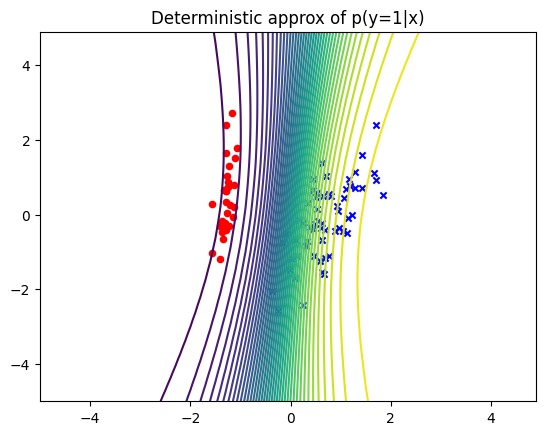

In [ ]:
#Numerical
plt.figure(8)
plt.scatter(x_setosa, y_setosa, c='red', s=20, marker='o', label='Setosa')
plt.scatter(x_resto, y_resto, c='blue', s=20, marker='x', label='Resto de clases')

m = np.dot(Xgrid, wfit)
cov = np.linalg.inv(hfit)
v = np.sum(Xgrid * np.dot(cov, Xgrid.T).T, axis=1)
kv = 1. / np.sqrt(1. + 0.125 * np.pi * v)
logits = m * kv
pr = 1/(1 + np.exp(-logits))

plt.contour(xx, yy, pr.reshape((n, n)), 45)
plt.title("Deterministic approx of p(y=1|x)")

plt.show()

**Prueba con los Test**

(60, 2) (120, 1)


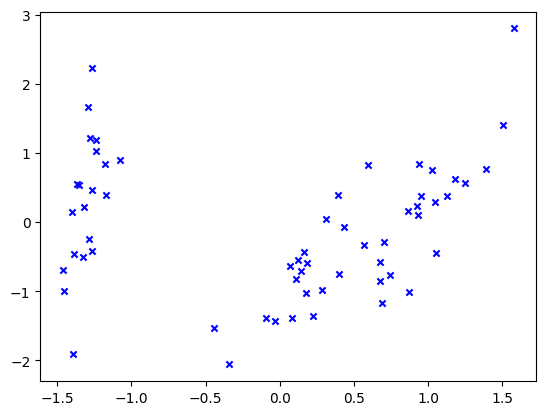

In [ ]:
# Normalizar los datos con media 0
X = (XX - mean) / std

X_T = np.vstack((X[30:50],X[80:100], X[130:150])) # 20 de setosa + 20 versicolor + 20 virginica

#print(X_1_t.T)

N = 60
D = 2

XT = np.vstack((X_T)) # Features
t = np.vstack((np.zeros((N,1)),np.ones((N,1)))) # Labels
print(np.shape(XT), np.shape(t))

#Plotting data

plt.figure(0)
xt_1, yt_1 = XT.T
plt.scatter(xt_1, yt_1, c = 'blue', s = 20, marker = 'x')


**Graficamos la distribución predictiva**

Text(0.5, 1.0, 'p(y=1|x, wMAP)')

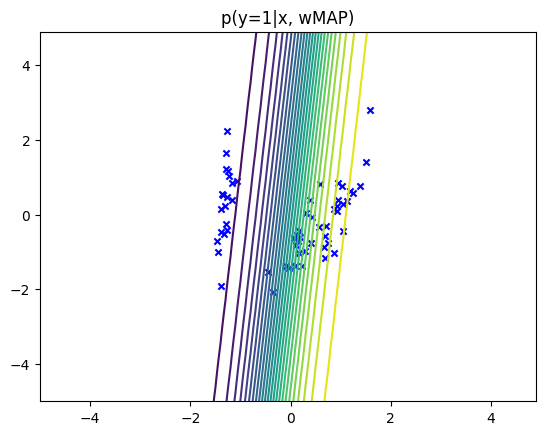

In [ ]:
#Plotting the predictive distribution for logistic regression
plt.figure(5)
logits=np.dot(Xgrid,wfit) #  y=w1x+w2
pred = 1.0/(1+np.exp(-logits))
plt.contour(xx, yy, pred.reshape((n,n)), 30)
plt.figure
xt_1, yt_1 = XT.T
plt.scatter(xt_1, yt_1, c = 'blue', s = 20, marker = 'x')
plt.title("p(y=1|x, wMAP)")

**`Graficando los Limites`**

Text(0.5, 1.0, 'Decision boundary for sampled w')

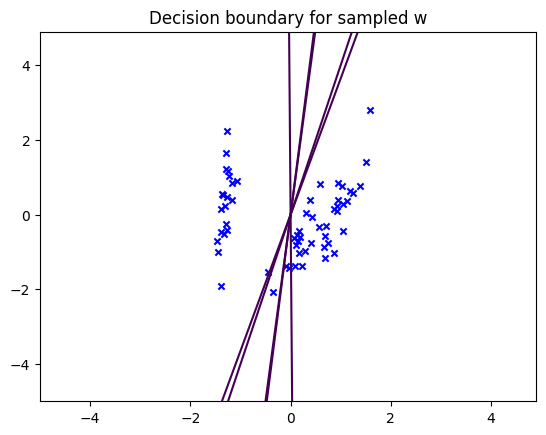

In [ ]:
#Decision boundary for sampled w
plt.figure(6)
plt.scatter(xt_1, yt_1, c = 'blue', s = 20, marker = 'x')

s = 5
for i in range(s):
    wsamp = np.random.multivariate_normal(mean = wfit, cov=co)
    pred = 1.0/(1+np.exp(np.dot(-Xgrid,wsamp)))
    plt.contour(xx, yy, pred.reshape((n,n)), np.array([0.5]))
plt.title("Decision boundary for sampled w")

**Graficando Aproximacion MC**

Text(0.5, 1.0, 'MC approx of p(y=1|x)')

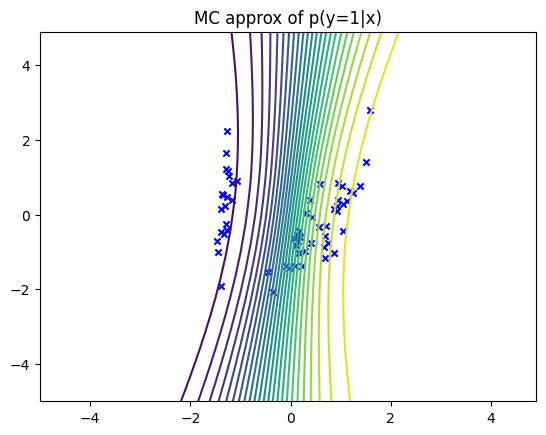

In [ ]:
plt.figure(7)
predm = np.zeros((n*n,1))
s = 50
for i in range(s):
    wsamp = np.random.multivariate_normal(mean = wfit, cov=co)
    pred = 1.0/(1+np.exp(np.dot(-Xgrid,wsamp)))
    predm = np.add(predm, pred.reshape((n*n, 1)))

predm = predm/s
plt.contour(xx, yy, predm.reshape((n,n)), 30)
plt.scatter(xt_1, yt_1, c = 'blue', s = 20, marker = 'x')
plt.title("MC approx of p(y=1|x)")

**Prueba con los TEST**

In [ ]:
predm = np.zeros((n*n,1))
s = 100
pred_list = []

#print(XT[50,:])
x_new = XT[0,:]
print(x_new)
k=0
y_pred = []
for x_new in XT:
  for i in range(s):
    wsamp = np.random.multivariate_normal(mean = wfit, cov=co)
    pred = 1.0/(1+np.exp(np.dot(-x_new,wsamp)))
    pred_list.append(pred)
    v = np.var(pred_list, axis=0)
    pred_f = np.mean(pred_list, axis=0)
  pred_list= []
  print(k,x_new, v, pred_f)
  k=k+1
  y_pred.append(pred_f)
  #print(x_new[0], v, 1-pred_f)

[-1.26251315 -0.41615149]
0 [-1.26251315 -0.41615149] 0.0010941591545946025 0.03917321016126273
1 [-1.17591917  0.83696167] 0.0008530486021449782 0.03760944109359728
2 [-1.29250425  1.65664186] 0.0006760788088742613 0.027839287736617733
3 [-1.26804563  2.22649567] 0.0006763281128989335 0.02645297301458317
4 [-1.28668038 -0.24710674] 0.000667835143541263 0.03192154996474314
5 [-1.39857382  0.14128006] 0.0002799999737853453 0.02175352365774521
6 [-1.28097685  1.22078391] 0.0009332476814118434 0.02768076677825509
7 [-1.36658522  0.54716776] 0.0002927138317233605 0.021822571263736955
8 [-1.45432683 -0.99386302] 0.0003751058067777486 0.02281729279232303
9 [-1.26378564  0.46651154] 0.0003702246858631255 0.026380149315652756
10 [-1.35166298  0.53674719] 0.00025683744368429904 0.022217568482059025
11 [-1.39034072 -1.91652817] 0.0017911415529814367 0.043572658118226845
12 [-1.46257533 -0.69642761] 0.0017454952068553984 0.025109032156452094
13 [-1.17381221  0.38468925] 0.00045532445222241295 0.0

**Graficando los Resultados de los Test**

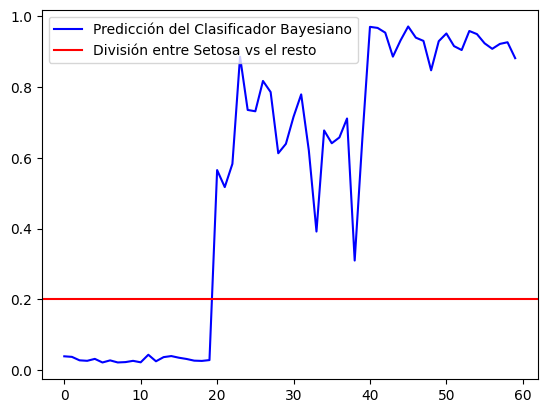

In [ ]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.plot(np.arange(len(y_pred)), y_pred, 'b', label='Predicción del Clasificador Bayesiano')

# Se agrega una línea horizontal roja en el valor 0.2 que indica nuestro Umbral
ax2.axhline(y=0.2, color='red',label='División entre Setosa vs el resto')

plt.legend(loc='upper left')
plt.show()
